# Aprendizaje Supervisado: Laboratorio 1

In [1]:
#Imports genericos
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline


## Ejercicio 1: SVM con Kernel y Regularización

En este ejercicio se trabajará con datos que esconden un patrón. Los datos mezclan columnas con valores enteros, flotantes y booleanos.

Debe analizar los datos de entrenamiento para encontrar el patrón, y luego entrenar una SVM que explique a la perfección esos datos (accuracy 1.0 en train). Por último, deberá evaluar la SVM en los datos de test, y modificar los parámetros de regularización hasta encontrar una configuración que dé una accuracy mayor a 0.9.

In [2]:
# cargar datos de entrenamiento y evaluación

train = pd.read_csv('datasets/lab1/ej1_train.csv')
X_train = train.iloc[:, :-1]
#X_train = StandardScaler().fit_transform(X_train)
Y_train = train['TARGET']

test = pd.read_csv('datasets/lab1/ej1_test.csv')
X_test = test.iloc[:, :-1]
#X_test = StandardScaler().fit_transform(X_test)
Y_test = test['TARGET']

### Ejercicio 1a:

Primero imprima una descripción básica de los datos.

Luego, calcule y grafique un mapa de calor con la correlación entre los distintos features.

In [3]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,TARGET
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,100.567500,101.035000,98.930000,100.445000,98.487500,0.007970,-0.009065,-0.019228,-0.009865,0.03500,0.08750,0.172500,0.237500,0.220000,0.132500,0.075000,0.040000,-0.00500
std,86.549654,49.517155,91.403921,62.199267,36.299366,0.782708,0.560037,0.514925,0.924287,0.18401,0.28292,0.378288,0.426084,0.414765,0.339458,0.263721,0.196205,1.00124
min,-93.000000,-10.000000,-115.000000,-39.000000,11.000000,-1.725988,-1.300851,-1.244842,-2.168412,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
25%,46.000000,73.000000,37.500000,61.750000,73.000000,-0.488926,-0.366255,-0.382066,-0.646990,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
50%,100.500000,100.000000,100.000000,100.000000,99.500000,0.005970,-0.010120,-0.013890,0.000883,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000
75%,155.250000,133.250000,153.250000,140.000000,122.000000,0.510675,0.314739,0.300218,0.544438,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,299.000000,217.000000,323.000000,243.000000,185.000000,1.785821,1.369928,1.217912,2.240643,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


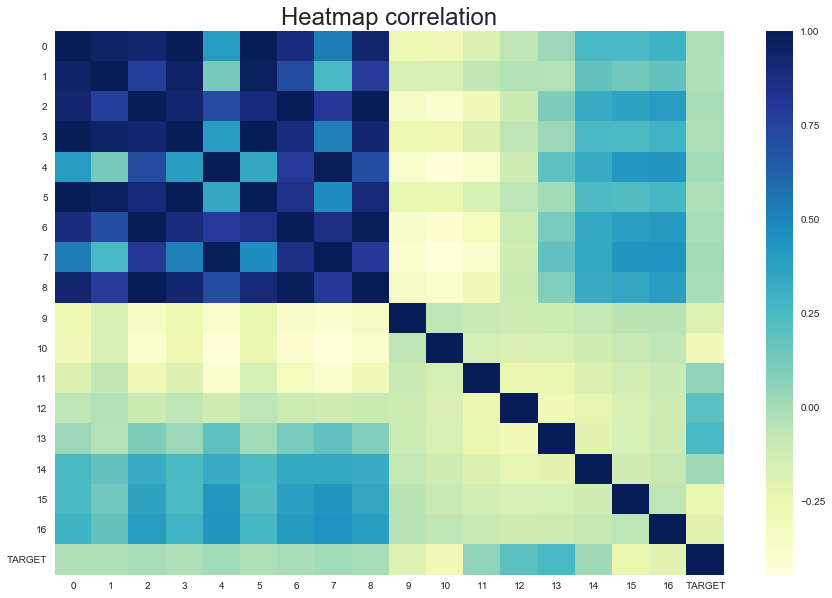

In [4]:
# COMPLETAR: calcular y graficar correlación entre features
# AYUDA: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

df_corr = train.corr() # Calculation of the correlation coefficients in pairs, with the default method:
                    # Pearson, Standard Correlation Coefficient
    
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

array([[-4.97746538e-01,  4.39659223e-01,  3.11635406e-04,
         1.03232616e-01,  1.20612722e-01, -3.56162735e-01,
         8.84974350e-02,  4.54178945e-01,  4.25022653e-01,
        -1.06696589e-01, -2.43098228e-02, -3.55513482e-03,
        -1.15838140e-02, -3.88151667e-03,  4.16303724e-04,
        -5.50782345e-17, -6.87350120e-17],
       [-4.15692302e-01,  2.29392848e-03,  6.62561809e-01,
        -1.27225077e-02, -2.28658627e-01,  5.74631554e-01,
        -4.55270833e-02,  5.23319276e-02,  1.58185959e-02,
         1.11648554e-02, -1.27422662e-02,  3.16499860e-03,
         1.34624009e-02, -4.27651618e-03,  5.56529066e-04,
         1.60620457e-16, -1.24544232e-16],
       [-5.00094291e-01,  1.12111830e-01, -7.09938118e-01,
        -4.13945526e-02, -1.54469640e-01,  4.05253651e-01,
        -5.61719916e-02, -1.34078794e-01, -1.41420122e-01,
         4.56114523e-02,  4.19494752e-03, -3.48431419e-03,
        -1.64283057e-02,  2.64465688e-03,  7.16575633e-04,
         1.24212553e-17,  7.1

21379.86465282291
2105.723219411651
0.25844670782691354
0.19586620748559397
0.1478490964141764
0.13462859206548905
0.12373146205334688
0.10485508489229545
0.08403676697341464
0.05648529093165301
0.04461786726606494
0.001949926036416135
2.4390687957945926e-05
1.3148929698281246e-05
7.139594888945032e-17
2.6099443113492032e-17
5.696507404899594e-18


array([ 91.02950988,  99.99509296,  99.99619335,  99.99702729,
        99.99765679,  99.99823001,  99.99875682,  99.99920326,
        99.99956107,  99.99980157,  99.99999154,  99.99999984,
        99.99999994, 100.        , 100.        , 100.        ,
       100.        ])

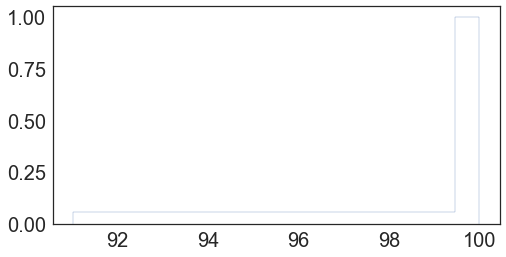

In [5]:
cov_mat = np.cov(X_train.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

u,s,v = np.linalg.svd(X_train.T)
display( u )

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

display( cum_var_exp ) 

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(
                   cum_var_exp, 
                   len(cum_var_exp), 
                   density    = True, 
                   histtype   = 'step',
                   cumulative = True, 
                   label      = 'Empirical')


**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?
  
  Que si bien tenemos 17 componentes podemos explicar el 99.9904% del comportamiento con 9 de ellas
  

Por último, reduzca la dimensionalidad de los datos a dos dimensiones y grafique los puntos.

**Preguntas:**
- ¿Qué observa?
- ¿Qué conclusiones puede extraer?

In [6]:
# COMPLETAR: reducir dimensionalidad y graficar
pca = PCA( n_components = 2 )
X_train = pca.fit_transform(X_train)

print('Reduced number of features:', X_train.shape) 

components_df = pd.DataFrame(
                data = X_train, 
                columns = ['component1', 'component2']
)

df = pd.concat([components_df, Y_train], axis = 1)
df.rename(
    columns={
        'TARGET': 'target'
    }, 
    inplace = True
)

df.head(12)

Reduced number of features: (400, 2)


,component1,component2,target
0,-169.452309,61.923209,-1.0
1,-140.637635,-63.051982,-1.0
2,-9.971975,48.867243,1.0
3,28.025112,-61.117568,-1.0
4,-176.649479,51.593234,-1.0
5,-28.453538,-5.597614,1.0
6,54.742669,-73.930527,-1.0
7,-286.225438,-57.329041,-1.0
8,-337.649156,-18.828837,-1.0
9,12.097505,9.417517,1.0


% of each component [0.9102951  0.08965583]


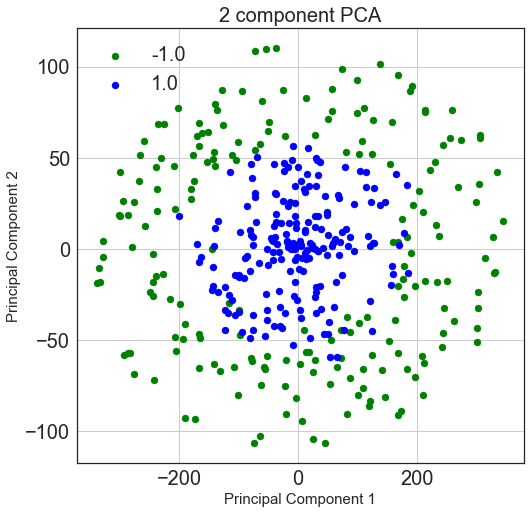

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1.0, 1.0]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(
        df.loc[indicesToKeep, 'component1'] , 
        df.loc[indicesToKeep, 'component2'] , 
        c = color , 
        s = 50
    )
    
ax.legend(targets)
ax.grid()

print('% of each component', pca.explained_variance_ratio_ )

### Ejercico 1b:

Primero calcule la accuracy sobre train para una SVM con kernel lineal.

In [8]:
seed = 9973

clf = SVC(
    kernel       = 'linear', 
    C            = 2 , 
    random_state = seed 
)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 0.6225


**Preguntas:**
- ¿Cuál es la accuracy?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique la SVM para lograr una accuracy en train de 1.0.

In [9]:
clf = SVC(
    kernel       = 'rbf' ,  
    random_state = seed
)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_train)
print('Accuracy en train:\t', accuracy_score(Y_train, Y_pred))

Accuracy en train:	 1.0


### Ejercicio 1c:

Evalúe la SVM del ítem anterior sobre los datos de test.

**Preguntas:**
- ¿Cuál es la accuracy en test?
- ¿Qué problema tiene el modelo? ¿De sesgo (bias) o de varianza?

Modifique parámetros de la SVM para lograr una accuracy en test mayor a 0.9.
La accuracy en train puede ser menos de 1.0.

Puede buscar los valores apropiados a mano o usar grid search.

In [10]:
X_test = pca.fit_transform(X_test)

print('Reduced number of features:', X_test.shape) 
display('% of each component {}'.format(pca.explained_variance_ratio_ ) )

Reduced number of features: (100, 2)


'% of each component [0.929686   0.07027118]'

In [11]:
Y_pred = clf.predict(X_test)
print('Accuracy en test:\t', accuracy_score(Y_test, Y_pred))

Accuracy en test:	 0.51


In [12]:
model = SVC( )
display(model.get_params().keys()) # to setup param grid

param_grid = {
    'kernel'       : ['rbf'], 
    'random_state' : [seed],
    'gamma'        : [1e-6,1e-3,1e-2, 0.1, 1, 10,1e3,1e6],
    'C'            : [1,2],
    'tol'          : [0.01, 0.0001, 0.000001]
}

scoreStrategy    = 'roc_auc' # None, 'recall', 'roc_auc', 'f1'
foldersNSplits   = 5

cv = KFold(
    n_splits = foldersNSplits, 
    shuffle  = True
)

grid = GridSearchCV(
    model, 
    param_grid = param_grid, 
    cv         = cv, 
    scoring    = scoreStrategy
)

grid.fit(X_train, Y_train)
trainScore = grid.score(X_train, Y_train)
print("Score arrojado por el modelo : {}".format(trainScore))  
print("Sugerencia de parametros en base a search grid: {} ".format(grid.best_params_)) 

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Score arrojado por el modelo : 0.9799244981124529
Sugerencia de parametros en base a search grid: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 9973, 'tol': 0.01} 


In [13]:
# TODO: Evaluación del modelo
def printMetrics(model, X_test, y_test):
    #Cross trained model againts test control dataset
    score = model.score(X_test, y_test)
    print("Puntaje sobre dataset de control: {0:.2f}".format(score))  
    print("Analisis de acuracy, sensitividad y falsos positivos|negativos contra dataset de control:")
    y_true, y_pred = y_test, model.predict(X_test)
    print("\n")
    print(classification_report(y_true, y_pred))

printMetrics(grid, X_test, Y_test)

Puntaje sobre dataset de control: 0.99
Analisis de acuracy, sensitividad y falsos positivos|negativos contra dataset de control:


             precision    recall  f1-score   support

       -1.0       0.88      0.98      0.92        43
        1.0       0.98      0.89      0.94        57

avg / total       0.94      0.93      0.93       100



## Ejercicio 2: Revisitando el Titanic

Este ejercicio se basa en el siguiente análisis de datos visto en clase:

- https://www.kaggle.com/zlatankr/titanic-random-forest-82-78/notebook

Aquí, se logra entrenar una Random Forest con un out-of-bag score de 0.8294.


### Ejercicio 2a:

El objetivo de este ejercicio es ver cuánto da el score si no se quiere hacer ninguna preparación de los datos.

Para esto, deben eliminarse las columnas que no tienen datos numéricos y las que tienen datos incompletos, ya que los algoritmos de aprendizaje automático no saben lidiar con ellos.

In [14]:
# cargar los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
# eliminar ids
# Allow safe repitition
cols = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
cols = [c for c in cols if c in train.columns]
train = train.drop(cols, axis='columns')

train = train.dropna() 
display(train.info())
train.head()

# COMPLETAR: eliminar las columnas que no tienen números, y las que tienen datos incompletos.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Survived    714 non-null int64
Pclass      714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


None

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [16]:
# entrenar la misma Random Forest, e imprimir el out-of-bag score


rf = RandomForestClassifier(
    criterion='gini', 
    n_estimators=700,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    random_state=1,
    n_jobs=-1
)

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.7311


### Ejercicio 2b:

En este ejercicio deberá hacer tres mejoras en la preparación de los datos:

- Completar la columna "Age" y usarla.
- Agregar una nueva columna con el largo del nombre.
- Convertir la columna "Sex" a valores numéricos y usarla.

Calcular el OOB score de cada una de las mejoras por separado.

**Responda**: ¿Cuál de las tres mejoras aporta más?

In [17]:
# cargar nuevamente los datos
import pandas as pd
train = pd.read_csv('datasets/titanic/train.csv')
train.describe( include = 'all' )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
# COMPLETAR: completar con el valor medio los datos faltantes en el campo Age
ageDf = train.copy()
ageDf['Age'].fillna((ageDf['Age'].mean()), inplace=True)
ageDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# COMPLETAR: agregar columna con el largo del nombre
nameLenDf = ageDf.copy()
nameLenDf['NameLength'] = nameLenDf['Name'].str.len()
nameLenDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


In [20]:
# COMPLETAR: poner 1 en lugar de 'female' y 0 en lugar de 'male'
# AYUDA: DEFINIR LA FUNCIÓN f Y HACER:
# train['Sex'] = train['Sex'].apply(f)
sexDf = nameLenDf.copy()
sexDf['Sex'] = sexDf['Sex'].apply(lambda x: 1 if x == "female" else 0)
sexDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,24


In [21]:
# COMPLETAR: eliminar las columnas que deban ser eliminadas
def removeExtraColumns( df , columns = ['PassengerId', 'Name', 'Ticket', 'Cabin',  'Embarked']):
    cols    = columns # Delete SexO
    cols    = [c for c in cols if c in df.columns]
    finalDf = df.drop(cols, axis='columns')
    return finalDf


finalDf = removeExtraColumns(sexDf)
finalDf = finalDf.dropna()
finalDf.describe( include = 'all' )

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NameLength
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,26.965208
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,9.281607
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,12.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,20.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,25.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,30.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,82.000000


In [22]:
# EJECUTAR ESTO TRES VECES, UNA VEZ PARA CADA MEJORA.
# entrenar el Random Forest, e imprimir out-of-bag score
rf = RandomForestClassifier(
        criterion='gini', 
        n_estimators=700,
        min_samples_split=10,
        min_samples_leaf=1,
        max_features='auto',
        oob_score=True,
        random_state=1,
        n_jobs=-1
)

# 1 Mejora en los promedios
ageDf = removeExtraColumns(ageDf , ['PassengerId', 'Name', 'Ticket', 'Cabin',  'Embarked', 'Sex'] )

#Fit and result
rf.fit(ageDf.iloc[:, 1:], ageDf.iloc[:, 0])
print("out-of-bag score = %.4f" % rf.oob_score_)

out-of-bag score = 0.7250


In [23]:
# 2 Mejora en los NameLength
nameLenDf = removeExtraColumns(nameLenDf, ['PassengerId', 'Name', 'Ticket', 'Cabin',  'Embarked', 'Sex'] )

#Fit and result
rf.fit(nameLenDf.iloc[:, 1:], nameLenDf.iloc[:, 0])
print("out-of-bag score = %.4f" % rf.oob_score_)

out-of-bag score = 0.7576


In [24]:
# 3 Mejora en datos de entrada y drops de data inutil

#Fit and result
rf.fit(finalDf.iloc[:, 1:], finalDf.iloc[:, 0])
print("out-of-bag score = %.4f" % rf.oob_score_)

out-of-bag score = 0.8339


### Extra point hacemos un GridSearch para poder encontrar mejores parámetros

In [25]:
model = RandomForestClassifier( )
display(model.get_params().keys()) # to setup param grid

param_grid = {
    'criterion'         : ['gini','entropy'], 
    'n_estimators'      : [700], 
    'min_samples_split' : [5],
    'min_samples_leaf'  : [1,2],
    'max_features'      : ['auto','sqrt','log2', None],
    'oob_score'         : [True],
    'random_state'      : [seed],
    'n_jobs'            : [-1] 
}

scoreStrategy    = 'roc_auc' # None, 'recall', 'roc_auc', 'f1'
foldersNSplits   = 5

cv = KFold(
    n_splits = foldersNSplits, 
    shuffle  = True
)

grid = GridSearchCV(
    model, 
    param_grid = param_grid, 
    cv         = cv, 
    scoring    = scoreStrategy
)

grid.fit(finalDf.iloc[:, 1:], finalDf.iloc[:, 0])
trainScore = grid.score(finalDf.iloc[:, 1:], finalDf.iloc[:, 0])
#print("%.4f" % model.oob_score_)
print("Score arrojado por el modelo : {}".format(trainScore))  
print("Sugerencia de parametros en base a search grid: {} ".format(grid.best_params_)) 

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Score arrojado por el modelo : 0.9854946260612064
Sugerencia de parametros en base a search grid: {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 700, 'n_jobs': -1, 'oob_score': True, 'random_state': 9973} 
